In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**FR**

>Trouver les colonnes et quel type de variables contiennent-t-elles.

**EN**

>Find column names and the variable type. 

In [3]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**FR**  

>Q : Est-ce qu'il y a des valeurs manquantes ?

>R : Non, aucune valeur n'est manquante. Nous ne sommes pas obligés de les remplacer par la médiane.

---

**EN**

>Q : Are there any missing values ? 

>A : No, there are no missing values. We can procede as we must not replace missing values by the median.

In [4]:
df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

Taux de comptes à terme. 88% des cas ce compte n'est pas choisi par le clients de la banque.

This is the rate of term deposit of the bank. 88% of clients chose to not have a term deposit. 

In [49]:
df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [67]:
df['age_group'] = pd.cut(df['age'], 
                        bins=[16, 25, 35, 45, 55, 65, 75, 85, 98], 
                        labels=['17-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-98'],
                        ordered=True)

crosstab_result = pd.crosstab(df["age_group"], df["y"], normalize="index") * 100

age_means = df.groupby('age_group')['age'].mean()
print("Mean ages by group:")
print(age_means)

print("\nCrosstab (percentages):")
print(crosstab_result)

Mean ages by group:
age_group
17-25    23.471188
26-35    31.219977
36-45    40.038539
46-55    50.095284
56-65    58.123861
66-75    70.173797
76-85    79.722772
86-98    88.930233
Name: age, dtype: float64

Crosstab (percentages):
y                 no        yes
age_group                      
17-25      79.051621  20.948379
26-35      88.280461  11.719539
36-45      91.490190   8.509810
46-55      91.308037   8.691963
56-65      84.778940  15.221060
66-75      56.951872  43.048128
76-85      47.029703  52.970297
86-98      48.837209  51.162791


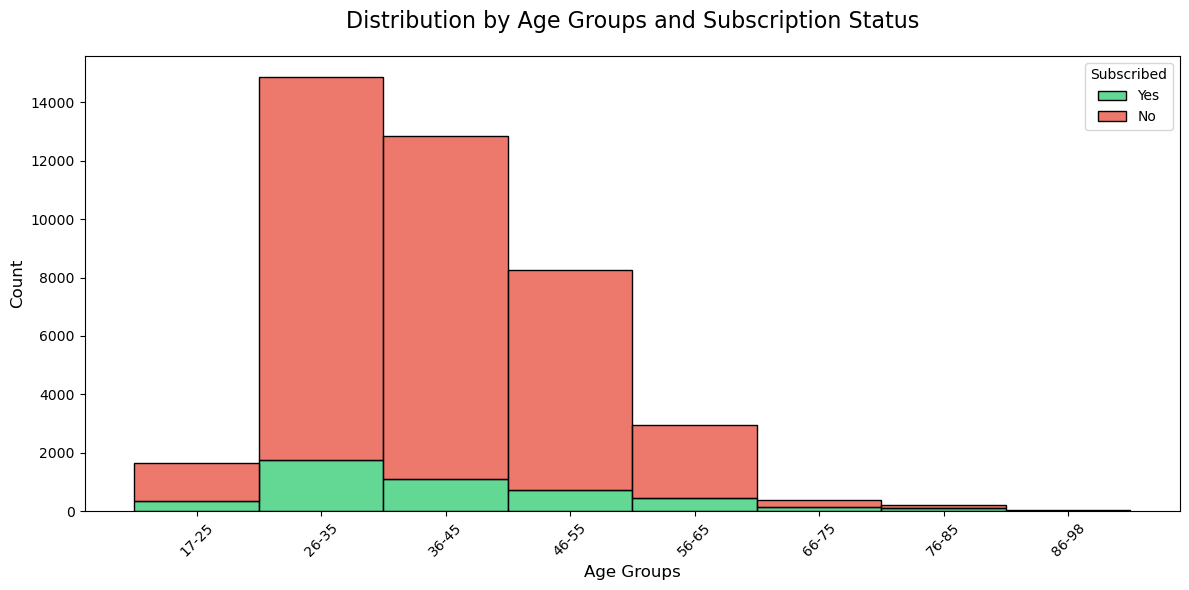

In [71]:
df['age_group'] = pd.cut(df['age'], 
                       bins=[16, 25, 35, 45, 55, 65, 75, 85, 98], 
                       labels=['17-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-98'],
                       ordered=True)

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age_group', hue='y', multiple='stack', 
            palette=['#e74c3c', '#2ecc71'])

plt.title('Distribution by Age Groups and Subscription Status', fontsize=16, pad=20)
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Subscribed', labels=['Yes', 'No'])
plt.tight_layout()
plt.show()

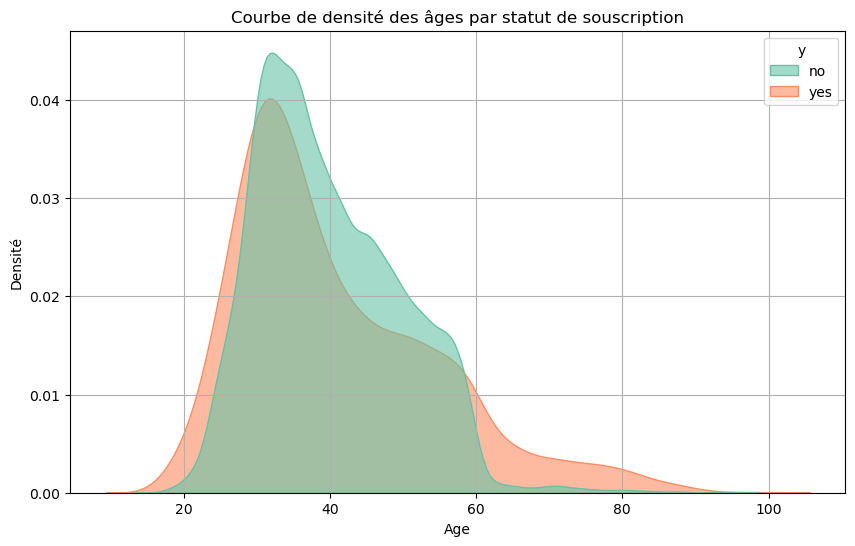

In [59]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='y', fill=True, common_norm=False, palette='Set2', alpha=0.6)
plt.title("Courbe de densité des âges par statut de souscription")
plt.xlabel("Age")
plt.ylabel("Densité")
plt.grid(True)
plt.show()

In [50]:
pd.crosstab(df["age"], df["y"], normalize="index") * 100

y,no,yes
age,,
17,60.000000,40.000000
18,57.142857,42.857143
19,52.380952,47.619048
20,64.615385,35.384615
21,71.568627,28.431373
...,...,...
91,100.000000,0.000000
92,25.000000,75.000000
94,100.000000,0.000000


In [6]:
pd.crosstab(df['marital'], df['y'], normalize='index')*100

y,no,yes
marital,,
divorced,89.679098,10.320902
married,89.842747,10.157253
single,85.995851,14.004149
unknown,85.000000,15.000000


**FR**

>On remarque que les personnes célibataires sont plus susceptibles de souscrire à un contrat à terme (14%).
>
>Les personnes mariées et divorcées ont tendance à avoir le même taux de suscription qui est ~10%.

---

**EN**

>Single clients have the highest subscription rate (14%).
>
>Married and Divorced have very similar and lower rates (\~10%).


In [47]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [48]:
pd.crosstab(df["job"], df["y"], normalize="index") * 100

y,no,yes
job,,
admin.,87.027442,12.972558
blue-collar,93.105684,6.894316
entrepreneur,91.483516,8.516484
housemaid,90.000000,10.000000
management,88.782490,11.217510
retired,74.767442,25.232558
self-employed,89.514426,10.485574
services,91.861930,8.138070
student,68.571429,31.428571


**FR** 

>Nous avons analysé la répartition des métiers des clients de la banque. Les métiers administratifs, techniques et ouvriers (« blue-collar ») sont les plus représentés. Il serait pertinent de comparer cette répartition avec celle de la population générale pour détecter d’éventuelles corrélations avec le taux de souscription.

---

**EN**

>We analyzed the distribution of clients’ occupations. Administrative, technical, and blue-collar jobs are the most common. It would be relevant to compare this distribution with that of the general population to detect potential correlations with subscription rates.

In [8]:
pd.crosstab(df["education"], df["y"], normalize="index") * 100

y,no,yes
education,,
basic.4y,89.750958,10.249042
basic.6y,91.797557,8.202443
basic.9y,92.175352,7.824648
high.school,89.164477,10.835523
illiterate,77.777778,22.222222
professional.course,88.651535,11.348465
university.degree,86.275477,13.724523
unknown,85.499711,14.500289


**FR**

>Nous observons que le niveau d'éducation semble influencer le taux de souscription. Les personnes sans instruction (illiterate) affichent le taux de souscription le plus élevé (22 %), bien que ce groupe soit probablement peu nombreux. Les titulaires d'un diplôme universitaire présentent également un taux de souscription supérieur à la moyenne (13,7 %), tandis que les niveaux d'éducation de base affichent des taux plus faibles (autour de 8–10 %).

---
**EN**

>We observe that education level seems to influence the subscription rate. Individuals without any education (illiterate) show the highest subscription rate (22%), although this group is probably very small. Clients holding a university degree also have an above-average subscription rate (13.7%), while basic education levels show lower rates (around 8–10%).

In [9]:
education_counts = df.groupby(['education', 'y']).size().unstack(fill_value=0)

print(education_counts)

education_percentages = education_counts.div(education_counts.sum(axis=1), axis=0) * 100

print(education_percentages)


y                       no   yes
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251
y                           no        yes
education                                
basic.4y             89.750958  10.249042
basic.6y             91.797557   8.202443
basic.9y             92.175352   7.824648
high.school          89.164477  10.835523
illiterate           77.777778  22.222222
professional.course  88.651535  11.348465
university.degree    86.275477  13.724523
unknown              85.499711  14.500289


**Conifrmation de la situation en indiquant les nombres de personnes concernées**

In [10]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [11]:
pd.crosstab(df["contact"], df["y"], normalize="index") * 100

y,no,yes
contact,,
cellular,85.262393,14.737607
telephone,94.768679,5.231321


**FR**

>Dans cette section, nous observons si les méthodes de contact sélectionnées pourraient avoir une corrélation avec le taux de souscription. On remarque que les clients contactés par téléphone mobile présentent une probabilité environ trois fois plus élevée d’avoir souscrit.

---
**EN**

>In this section, we observe whether the chosen contact methods could be correlated with the subscription rate. We note that clients contacted via mobile phone have approximately three times higher likelihood of having subscribed.


In [12]:
pd.crosstab(df['month'], df['y'], normalize="index")*100

y,no,yes
month,,
apr,79.521277,20.478723
aug,89.397863,10.602137
dec,51.098901,48.901099
jul,90.953443,9.046557
jun,89.488530,10.511470
mar,49.450549,50.549451
may,93.565255,6.434745
nov,89.856133,10.143867
oct,56.128134,43.871866


In [13]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

**FR**

>On observe que les taux de souscription sont significativement plus élevés en mars, septembre, octobre et décembre, atteignant près de 50 %. En revanche, les mois d’été (juillet, août) ainsi que mai affichent des taux de souscription beaucoup plus faibles, autour de 6 à 10 %. Cela pourrait refléter des comportements saisonniers dans la prise de décision des clients.

---
**EN**

>We observe that subscription rates are significantly higher in March, September, October, and December, reaching nearly 50%. In contrast, summer months (July, August) and May show much lower subscription rates, around 6 to 10%. This could reflect seasonal behaviors in clients' decision-making.



In [14]:
duration_stats = df.groupby("y")['duration'].agg(['mean', 'median'])
print(duration_stats)

           mean  median
y                      
no   220.844807   163.5
yes  553.191164   449.0


**FR**

>Nous avons cherché à déterminer s’il existait une corrélation entre la durée de l’appel et le taux de souscription au contrat à terme. Notre hypothèse, selon laquelle une durée plus élevée coïnciderait avec un taux de souscription plus important, a été confirmée. Comme le montre le tableau ci-dessus, la durée moyenne des appels conclus par une souscription est nettement supérieure (553 secondes contre 220 secondes). La médiane suit la même tendance (449 secondes contre 163,5 secondes).

---

**EN**

>We aimed to determine whether there was a correlation between call duration and subscription rate. Our hypothesis, which stated that longer calls would coincide with higher subscription rates, was confirmed. As shown in the table above, the average duration of calls that ended in a subscription is significantly higher (553 seconds compared to 220 seconds). The median follows the same pattern (449 seconds versus 163.5 seconds).


In [15]:
contacts_stats = df.groupby("y")["campaign"].agg(["mean", "median"])
print(contacts_stats)

         mean  median
y                    
no   2.633085     2.0
yes  2.051724     2.0


**FR**

>Nous avons analysé la relation entre le nombre de contacts effectués durant la campagne et le taux de souscription. La moyenne est supérieure à la médiane, ce qui indique une distribution asymétrique à droite : la majorité des clients a été contactée peu de fois, tandis qu’un petit groupe a reçu de nombreux appels. Cette observation suggère qu’un nombre plus élevé de contacts n’est pas nécessairement corrélé à un meilleur taux de souscription, et pourrait au contraire générer un effet négatif.

---

**EN**

>We analyzed the relationship between the number of contacts during the campaign and subscription rates. The mean exceeds the median, indicating a right-skewed distribution: most clients were contacted only a few times, while a smaller group received many calls. This observation suggests that a higher number of contacts is not necessarily correlated with a higher subscription rate and could even have a negative effect.



In [16]:
df.groupby("y")["campaign"].agg(["mean", "median", "min", "max"])

,mean,median,min,max
y,,,,
no,2.633085,2.0,1,56
yes,2.051724,2.0,1,23


**FR**

> Nous avons mesuré le nombre de fois où les clients ont été contactés afin de déterminer si un plus grand nombre de prises de contact est corrélé à un taux de souscription plus élevé.
>
> Tout d’abord, le nombre minimal de contacts n’est pas informatif, car les clients doivent être contactés au moins une fois pour pouvoir souscrire.
>
> Cependant, le nombre maximal de contacts est nettement plus élevé chez les personnes n’ayant pas souscrit (56 contre 23). Cela suggère que contacter de façon répétée les mêmes clients n’est pas nécessairement efficace et pourrait même réduire la probabilité d’obtenir un résultat positif.
>
> En moyenne, les clients qui ont souscrit ont été légèrement moins contactés (moyenne \~2,05) que ceux qui n’ont pas souscrit (moyenne \~2,63). Les médianes sont identiques (2), ce qui indique qu’au-delà d’un certain point, les relances supplémentaires n’augmentent pas les chances de succès.
>
> Cela reflète probablement le fait que les clients réellement intéressés nécessitent moins de persuasion, tandis que ceux qui ne sont pas intéressés le resteront, peu importe le nombre d’appels.
>
> Par conséquent, au lieu de privilégier des relances fréquentes, la banque pourrait obtenir de meilleurs résultats en améliorant le ciblage et en atteignant de nouveaux clients potentiels.

---

**EN**

> We measured the number of times people were contacted to determine whether a greater number of contacts correlates with higher subscription rates.
>
> First, the minimum number of contacts is not informative since clients must be contacted at least once in order to subscribe.
>
> However, the maximum number of contacts was much higher among those who did not subscribe (56 vs. 23). This suggests that repeatedly contacting the same person is not necessarily effective and may even reduce the likelihood of a positive outcome.
>
> On average, clients who subscribed received slightly fewer contacts (mean \~2.05) than those who did not subscribe (mean \~2.63). The medians are identical (2), indicating that beyond a certain point, additional calls do not increase success.
>
> This likely reflects that clients who are genuinely interested require less convincing, while those who are not interested will remain so regardless of repeated contact.
>
> Therefore, instead of focusing on high-frequency follow-ups, the bank may achieve better results by improving targeting and reaching new potential customers.



In [18]:
df['pdays'].describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [19]:
df['pdays'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 41188 entries, 0 to 41187
Series name: pdays
Non-Null Count  Dtype
--------------  -----
41188 non-null  int64
dtypes: int64(1)
memory usage: 321.9 KB


In [20]:
df.groupby("y")["pdays"].agg(["mean", "median", "min", "max"])

,mean,median,min,max
y,,,,
no,984.113878,999.0,0,999
yes,792.035560,999.0,0,999



**FR**

> Nous constatons que la valeur moyenne de `pdays` pour les clients ayant souscrit est plus faible (792) que celle des clients n’ayant pas souscrit (984). Cela signifie que les clients qui avaient été contactés plus récemment lors de campagnes précédentes étaient plus susceptibles de souscrire. Cependant, comme la médiane est de 999 pour les deux groupes, la majorité des clients n’avaient jamais été contactés auparavant, et cet effet concerne principalement le petit groupe ayant déjà été contacté.

---

**EN**

> We observe that the average `pdays` for clients who subscribed is lower (792) compared to those who did not subscribe (984). This means that clients who had been contacted more recently in previous campaigns were more likely to subscribe. However, since the median remains 999 for both groups, the majority of clients had never been contacted before, and this effect mainly applies to the smaller group who were previously contacted.


In [21]:
df.groupby('y')['previous'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36548.0,0.132374,0.409199,0.0,0.0,0.0,0.0,7.0
yes,4640.0,0.492672,0.860344,0.0,0.0,0.0,1.0,6.0


**FR**

>Nous constatons que la *moyenne* du nombre de contacts précédents est inférieure à l’écart-type, ce qui indique une distribution très dispersée. La plupart des valeurs sont en réalité **nulles**, comme le montre la médiane (0,0) et le troisième quartile (0,0 pour « no » et 1,0 pour « yes »). Cela suggère que, pour la majorité des clients, il n’y a pas eu de contacts avant cette campagne.
>
>Il est intéressant de noter que le nombre moyen de contacts précédents est plus élevé parmi les personnes ayant souscrit (moyenne \~0,49 contre \~0,13). Cela pourrait indiquer qu’un contact préalable peut contribuer à augmenter le taux de souscription, mais puisque la distribution est très asymétrique (beaucoup de zéros, quelques valeurs élevées), cette conclusion doit être considérée avec prudence. Autrement dit, l’analyse n’est pas entièrement concluante, car la plupart des clients n’ont jamais été contactés auparavant.

---

**EN**

>We can see that the *mean* number of previous contacts is less than the *standard deviation*, which indicates a very dispersed distribution. Most values are actually **zero**, as shown by the median (0.0) and the 75th percentile (0.0 for “no” and 1.0 for “yes”). This suggests that for most clients, there were no previous contacts before this campaign.
>
>Interestingly, the average number of previous contacts is higher among people who subscribed (mean \~0.49 vs. \~0.13). This could imply that prior contact can help improve subscription rates, but since the distribution is so skewed (most zeros, a few higher values), this conclusion should be taken with caution. In other words, the analysis is not conclusive because most clients were never contacted before.


In [22]:
df.groupby('poutcome')['y'].value_counts(normalize=True).unstack().fillna(0)*100

y,no,yes
poutcome,,
failure,85.771402,14.228598
nonexistent,91.167787,8.832213
success,34.887109,65.112891



**FR**

>`poutcome` représente le résultat de la campagne marketing précédente : si le dernier contact avec le client a été un *succès*, un *échec* ou n’a pas eu lieu (*nonexistent*).
>
>Comme nous pouvons le constater, le résultat de la campagne précédente est clairement corrélé avec la probabilité de souscription :
>
>* Lorsque le résultat précédent était un **succès**, le taux de souscription est très élevé (65 %).
>* Lorsque le résultat précédent était un **échec**, le taux de souscription tombe à environ 14 %.
>* En l’absence de contact antérieur, le taux de souscription est le plus bas (\~9 %).
>
>Cela suggère qu’un engagement positif préalable rend les clients beaucoup plus réceptifs, tandis qu’un échec ou une absence de contact sont associés à un taux de souscription plus faible. Cela montre que les personnes ayant répondu positivement par le passé sont plus susceptibles de souscrire à nouveau.

---

**EN**




>`poutcome` represents the outcome of the previous marketing campaign: whether the last contact attempt with the client was a *success*, *failure*, or did not exist (*nonexistent*).
>
>As we can observe, the outcome of the prior campaign is clearly correlated with the likelihood of subscription:
>
>* When the previous outcome was **success**, the subscription rate is very high (65%).
>* When the previous outcome was **failure**, the subscription rate drops to \~14%.
>* When there was **no prior contact**, the subscription rate is the lowest (\~9%).
>
>This suggests that prior positive engagement makes customers much more receptive, while failure or no contact are associated with lower subscription rates. It shows that people who responded positively in the past are more likely to subscribe again.


In [23]:
df.groupby('y')['emp.var.rate'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36548.0,0.248875,1.482932,-3.4,-1.8,1.1,1.4,1.4
yes,4640.0,-1.233448,1.623626,-3.4,-1.8,-1.8,-0.1,1.4


**FR**

>On observe que, en moyenne, le taux de variation de l’emploi est **négatif chez les personnes qui ont souscrit** (-1,23), tandis qu’il est **positif chez celles qui n’ont pas souscrit** (+0,25).
>
>Cela suggère que les clients étaient plus susceptibles de souscrire lorsque l’économie et l’emploi se détérioraient (variation négative). Il est possible que, pendant les périodes économiques difficiles, les personnes soient plus enclines à sécuriser des produits financiers comme les dépôts à terme.
>
>Les écarts-types relativement élevés (\~1,48 et \~1,62) indiquent que la variable est assez dispersée, confirmant que la distribution est étalée et probablement asymétrique. Ainsi, même si la tendance moyenne est claire, les situations individuelles varient beaucoup.

---

**EN**

>We observe that, on average, the employment variation rate is **negative among the people who subscribed** (-1.23), while it is **positive among those who did not subscribe** (+0.25).
>
>This suggests that clients were more likely to subscribe when the economy and employment were deteriorating (negative variation). Possibly, during worse economic periods, people are more inclined to secure financial products such as term deposits.
>
>The relatively large standard deviations (\~1.48 and \~1.62) indicate that the variable is quite spread out, confirming that the distribution is dispersed and probably skewed. Therefore, while the trend is clear on average, individual situations can vary significantly.




In [24]:
df.groupby('y')['cons.price.idx'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36548.0,93.603757,0.558993,92.201,93.075,93.918,93.994,94.767
yes,4640.0,93.354386,0.676644,92.201,92.893,93.200,93.918,94.767



### Analyse de l’Indice des Prix à la Consommation (IPC)

On observe que les valeurs de l’Indice des Prix à la Consommation (IPC) sont très similaires entre les personnes ayant souscrit et celles ne l’ayant pas fait. Cela est logique, car l’IPC est un indice économique reflétant le niveau général des prix et ne varie donc pas selon les groupes individuels.

De plus, l’écart-type est très faible par rapport à la moyenne, ce qui indique que les variations des prix des biens et services sont assez stables durant la période. La moyenne et la médiane sont proches, ce qui suggère que la distribution est assez symétrique avec peu d’asymétrie.

Puisque les valeurs de l’IPC tournent autour de 93-94 (avec 100 comme base), cela implique une baisse d’environ 6 à 7 % des prix par rapport à la période de référence, ce qui suggère un contexte déflationniste dans l’économie durant la période étudiée.




### Consumer Price Index (CPI) Analysis

We observe that the Consumer Price Index (CPI) values are very similar for both people who subscribed and those who did not. This makes sense because CPI is an economic index reflecting the general price level and thus does not vary between individual groups.

Additionally, the standard deviation is very low compared to the mean, indicating that the price changes for goods and services are quite stable over the period. The mean and median are close, suggesting the distribution is fairly symmetric with little skew.

Since the CPI values are around 93-94 (with 100 typically as the base), this implies roughly a 6-7% decrease in prices compared to the base period, which suggests a deflationary environment in the economy during the time of the data.


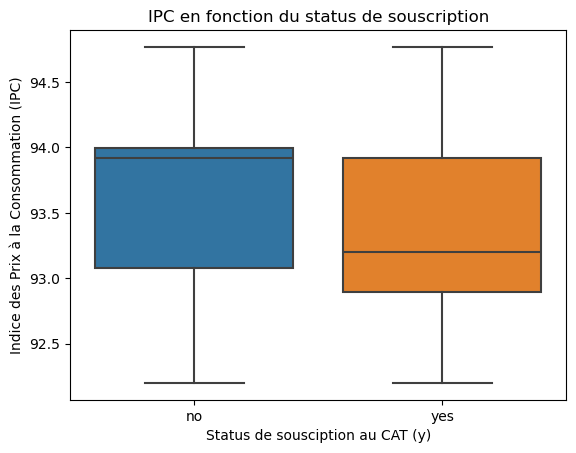

In [26]:
sns.boxplot(x='y', y='cons.price.idx', data=df)
plt.title("IPC en fonction du status de souscription")
plt.xlabel('Status de sousciption au CAT (y)')
plt.ylabel('Indice des Prix à la Consommation (IPC)')
plt.show()


In [31]:
df.groupby("y")["cons.conf.idx"].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36548.0,-40.593097,4.391155,-50.8,-42.7,-41.8,-36.4,-26.9
yes,4640.0,-39.789784,6.139668,-50.8,-46.2,-40.4,-36.1,-26.9


## Analyse de l'Indice de confiance des consommateurs

>Nous observons que l'indice de confiance des consommateurs (CCI) est en moyenne négatif pour les deux groupes, ce qui indique que, en général, les clients de la banque sont pessimistes quant à la situation économique globale. Ce pessimisme suggère qu'ils sont moins enclins à faire de nouveaux investissements, mais pourraient être davantage focalisés sur la protection de leur épargne. L'écart type relativement faible indique que ce sentiment est partagé de manière assez homogène parmi les clients. Cette observation est cohérente avec les valeurs négatives précédemment observées de l'indice des prix à la consommation (CPI), qui reflètent un environnement déflationniste où la croissance économique est faible et où moins d'investissements sont réalisés globalement.

## Consumer Confidence Index (CCI) Analysis

>We observe that the Consumer Confidence Index (CCI) is on average negative for both groups, indicating that, generally, the bank’s customers are pessimistic about the overall economic situation. This pessimism suggests they are less likely to make new investments but may be more focused on protecting their savings. The relatively low standard deviation indicates that this sentiment is fairly consistent across customers. This finding aligns with the previously observed negative Consumer Price Index (CPI) values, reflecting a deflationary environment where economic growth is weak and fewer investments are being made globally.


In [32]:
df.groupby('y')['euribor3m'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36548.0,3.811491,1.638187,0.634,1.405,4.857,4.962,5.045
yes,4640.0,2.123135,1.742598,0.634,0.849,1.266,4.406,5.045


## Analyse de la reation entre le taux Euribor 3 mois et la souscription au compte à terme

>Nous constatons que le taux Euribor à 3 mois moyen est d’environ **3,8%** pour les personnes n’ayant pas souscrit et **2,1%** pour celles ayant souscrit. Un Euribor supérieur à 3% reflète un environnement économique où le coût d’emprunt est relativement élevé, ce qui peut décourager la prise de crédit et inciter les clients à se montrer prudents.
>
>La différence de moyenne suggère que les souscriptions ont davantage eu lieu lorsque le taux était plus bas, ce qui correspond à une période où l’argent est moins coûteux et où les clients sont peut-être plus enclins à s’engager financièrement.
>
>La dispersion (l’écart type) est modérée, ce qui indique qu’il existe une certaine variabilité des taux pendant la période observée, mais elle reste dans une fourchette interprétable.
>
>Ainsi, bien que ces résultats ne permettent pas d’établir une causalité certaine, ils suggèrent que les conditions de crédit plus favorables (taux plus faibles) pourraient être associées à un taux de souscription plus élevé.

---

## Analysis of the reelationship between the 3 months Euribor rate and the subscription rate


>We can see that the average 3-month Euribor rate is about **3.8%** for people who did not subscribe and **2.1%** for those who did subscribe. An Euribor above 3% reflects an economic environment where borrowing costs are relatively high, which can discourage taking credit and make customers more cautious.
>
>The difference in means suggests that subscriptions were more frequent when the rate was lower, corresponding to a period when money was cheaper and customers were perhaps more inclined to commit financially.
>
>The dispersion (standard deviation) is moderate, indicating that there was some variability in rates during the observed period, but it remains within a range that can be meaningfully interpreted.
>
>Therefore, while these results do not establish a certain causal relationship, they suggest that more favorable credit conditions (lower rates) could be associated with a higher subscription rate.

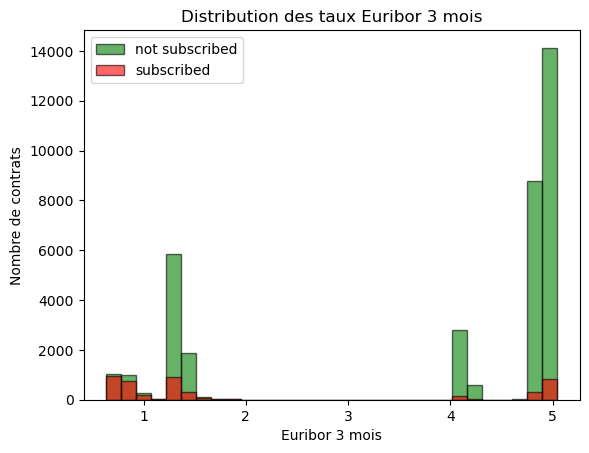

In [44]:
plt.hist(df[df['y']=='no']['euribor3m'], bins=30, alpha=0.6, color='Green', label="not subscribed", edgecolor='black')
plt.hist(df[df['y']=='yes']['euribor3m'], bins=30, alpha=0.6, color='red', label="subscribed", edgecolor='black')

plt.title("Distribution des taux Euribor 3 mois")
plt.xlabel("Euribor 3 mois")
plt.ylabel("Nombre de contrats")
plt.legend()
plt.show()

## Distribution des taux Euribor 3 mois

### Analyse

Nous observons une **distribution bimodale** des taux Euribor 3 mois. Cela signifie qu’il existe **deux pics de fréquence distincts** :

* Un premier pic autour de **1 %**, correspondant à une période de taux bas, postérieure à la crise financière de 2008.
* Un second pic, plus massif, autour de **5 %**, reflétant les taux plus élevés d’avant crise.

Cette distribution reflète une **évolution historique des politiques monétaires**, et non un biais de données :

* Avant 2008, les taux étaient élevés pour contenir l'inflation.
* Après la crise, les banques centrales ont réduit drastiquement les taux pour relancer l’économie.

L’écart-type élevé, combiné à une moyenne élevée, indique une **forte dispersion** des valeurs. Cela suggère que l’ensemble de données couvre **plusieurs phases économiques distinctes**.

**Remarque sur le graphique** : Lors du tracé des histogrammes superposés (clients ayant souscrit vs non souscrit), il faut **afficher d'abord le groupe le plus large**, puis le plus petit. Sinon, les barres du plus petit groupe peuvent être **entièrement masquées**.
L’usage d’une **transparence (`alpha`)** est aussi recommandé pour mieux visualiser les recouvrements.

---

### Analysis

We observe a **bimodal distribution** of 3-month Euribor rates, with **two distinct frequency peaks**:

* A first peak around **1%**, reflecting the low-rate environment that followed the 2008 financial crisis.
* A second, larger peak around **5%**, reflecting the higher interest rates prior to the crisis.

This distribution is not a sampling issue but rather a reflection of the **historical evolution of monetary policy**:

* Pre-2008: higher rates to fight inflation.
* Post-2008: central banks cut rates sharply to stimulate the economy.

The relatively high standard deviation, combined with a high mean, indicates a **wide spread**, suggesting the data includes **multiple economic cycles**.

**Note on the chart**: When plotting the overlaid histograms (subscribers vs. non-subscribers), it's important to **plot the larger group first**, then the smaller one. Otherwise, the smaller group's bars may be **hidden**.
Using **transparency (`alpha`)** helps better visualize overlapping bars.




In [45]:
df.groupby('y')['nr.employed'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36548.0,5176.166600,64.571979,4963.6,5099.1,5195.8,5228.1,5228.1
yes,4640.0,5095.115991,87.572641,4963.6,5017.5,5099.1,5191.0,5228.1


### Variable : `nr.employed` (Nombre d’employés)

#### Interprétation :

La moyenne du nombre d’employés est très proche entre les clients ayant souscrit (`yes`) et ceux qui ne l'ont pas fait (`no`), ce qui suggère que le marché de l’emploi, mesuré à travers cette variable macroéconomique, n’a pas d’impact direct sur le taux de souscription à l’offre bancaire.
La faible valeur de l’écart-type (moins de 2 % par rapport à la moyenne) indique que la distribution est très concentrée autour de la moyenne, ce qui signifie que la variable varie peu sur la période observée. Cela est cohérent avec le fait que `nr.employed` représente une variable macroéconomique, souvent stable à court terme.
Il est également intéressant de noter que la moyenne est légèrement plus basse chez les personnes ayant souscrit, ce qui pourrait indiquer une légère sensibilité du comportement des clients en période d'emploi légèrement plus bas, mais cette différence n’est pas suffisamment marquée pour être interprétée comme significative sans test statistique complémentaire.

#### Interpretation:

The average number of employees is very similar between clients who subscribed (`yes`) and those who didn’t (`no`), suggesting that the employment market, as measured by this macroeconomic indicator, likely does not have a direct effect on subscription behavior.
The standard deviation is small (less than 2% of the mean), indicating that the distribution is very narrow and concentrated around the average. This is consistent with the nature of `nr.employed` as a macroeconomic indicator, which tends to change slowly over time.
Interestingly, the average is slightly lower for those who subscribed, which could point to a slight behavioral response during periods of lower employment, but the difference is too small to be meaningful without further statistical testing.


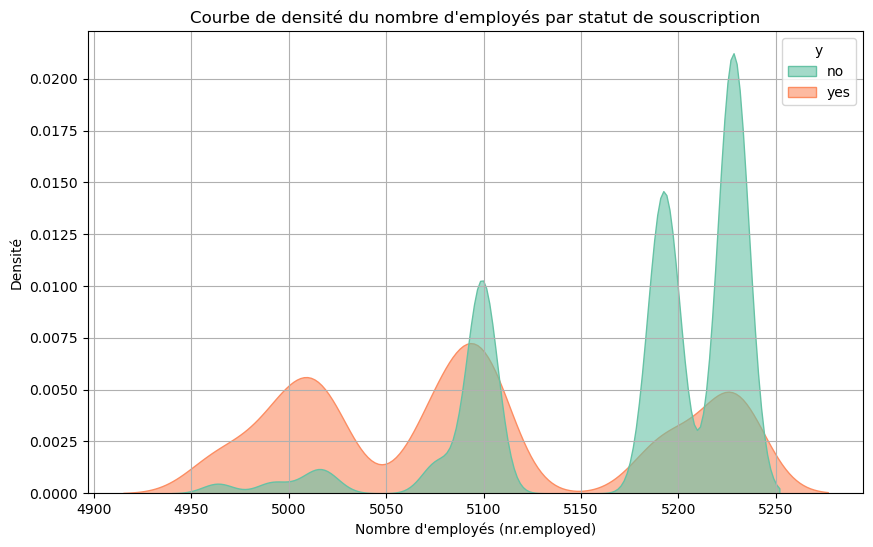

In [46]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='nr.employed', hue='y', fill=True, common_norm=False, palette='Set2', alpha=0.6)
plt.title("Courbe de densité du nombre d'employés par statut de souscription")
plt.xlabel("Nombre d'employés (nr.employed)")
plt.ylabel("Densité")
plt.grid(True)
plt.show()


# Conclusion (FR)

Notre but était d'établir une stratégie de marketing concernant le dépôt à terme. 

* En termes de publique à viser pour la campagne de marketing nous avons remarqué que les retraités, les étudiants ont une plus grande susceptibilité de souscription à ce produit. Ceci est également confimé par les ages où les personnes plus jeunes et plus agées ont des taux de souscription plus élevés. 


* En termes de période à viser ce sont les périodes dans lesquelles le CCI est positif et important. Lorsque l' IPC est élevé, et de préférence supérieur à 100 ainsi qu'avec et les taux Euribor 3 mois faible. En effet ces indicateurs indiquent un climat plus favorable à l'investissment, donc avantageux pour la souscription de produit comme le dépôt à terme. 


* En ce qui concerne la frequence de contact, elle devrait être limitée, puisque comme nous l'avons vu une plus grande fréquence n'est pas corrélée à une augmentation des probabilités de souscription. En effet, au délà d'un certain nombre de tentatives de contact la meilleure stratégie serait de virer vers d'autres clients qui n'auraient pas été contactés récemment. 


* Cette brève stratégie permet d'allouer les reessources de façon plus efficace lors de la promotion du **dépôt à terme**

---

# Conclusion (EN)

Our goal was to establish a marketing strategy regarding term deposits.

* In terms of target audience for the marketing campaign, we observed that retirees and students have a higher propensity to subscribe to this product. This is also confirmed by age analysis, where younger and older individuals have higher subscription rates.


* In terms of timing, the optimal periods are those when the CCI is positive and significant. When the CPI is high, preferably above 100, and with low 3-month Euribor rates. These indicators suggest a climate more favorable to investment, making it advantageous for subscribing to products like term deposits.


* Regarding contact frequency, it should be limited, as we have seen that higher frequency is not correlated with increased subscription probabilities. Indeed, beyond a certain number of contact attempts, the best strategy would be to shift focus to other clients who have not been contacted recently.


* This brief strategy allows for more efficient resource allocation when promoting **term deposits**.
